Number of nodes: 34
Number of edges: 78


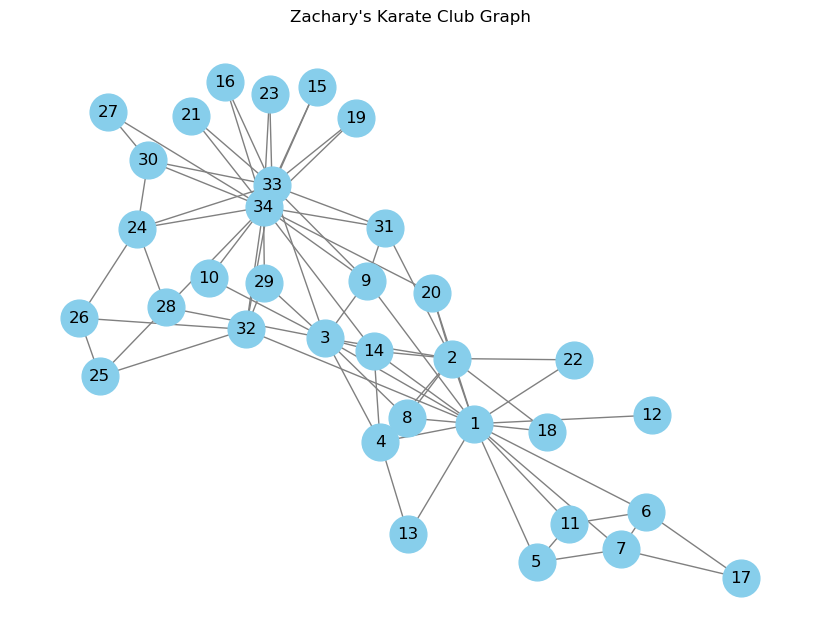

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the GML file
G = nx.read_gml('karate.gml', label='id')

# Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Plot the graph with node IDs as labels
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, labels={node: node for node in G.nodes(
)}, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Zachary's Karate Club Graph")
plt.savefig('graph.png')
plt.show()

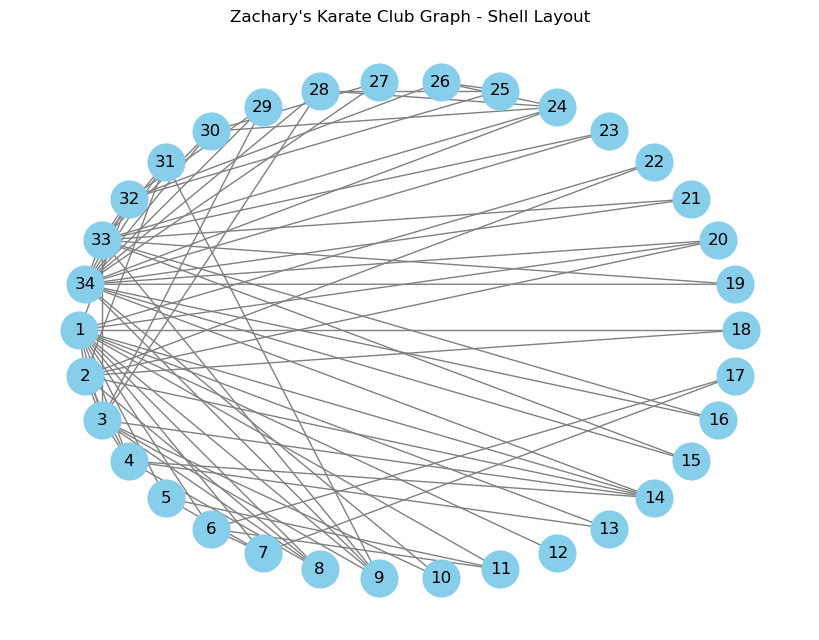

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the GML file
G = nx.read_gml('karate.gml', label='id')

# Plot the graph with a shell layout and node IDs as labels
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.shell_layout(G), with_labels=True, labels={
        node: node for node in G.nodes()}, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Zachary's Karate Club Graph - Shell Layout")
plt.savefig('zachary_karate_club_shell_layout.png')
plt.show()

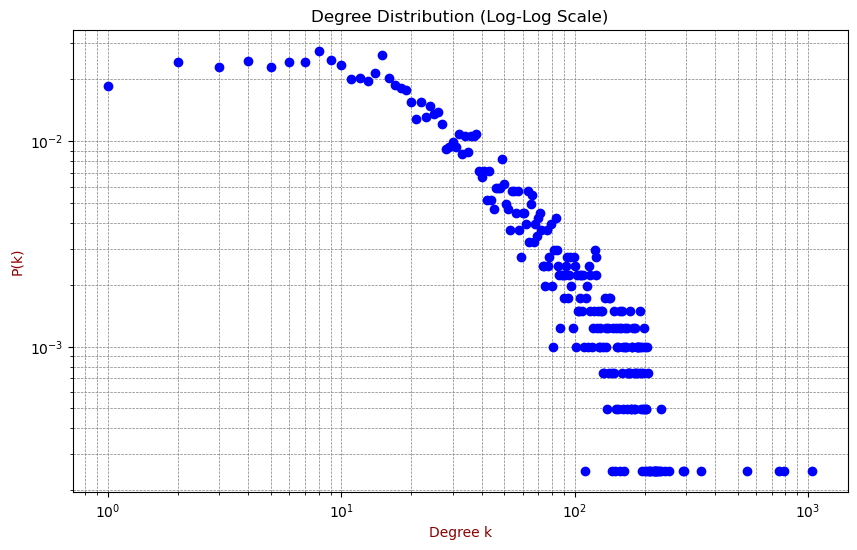

Average degree <k>: 43.69101262688784


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Load the dataset
file_path = "facebook_combined.txt"  # Ensure the file path is correct
G = nx.read_edgelist(file_path, nodetype=int)

# Step 2: Calculate the degree of each node
degrees = [degree for _, degree in G.degree()]

# Step 3: Compute the degree distribution P(k)
degree_counts = np.bincount(degrees)  # Count the frequency of each degree
total_nodes = G.number_of_nodes()
P_k = degree_counts / total_nodes  # Normalize to get probabilities

# Step 4: Compute the average degree <k>
average_degree = np.mean(degrees)

# Step 5: Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.loglog(range(len(P_k)), P_k, marker="o", linestyle="None", color="b")
plt.xlabel("Degree k", color="darkred")
plt.ylabel("P(k)", color="darkred")
plt.title("Degree Distribution (Log-Log Scale)", color="black")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")
plt.savefig("degree_distribution.png")
plt.show()

# Output the results
print(f"Average degree <k>: {average_degree}")

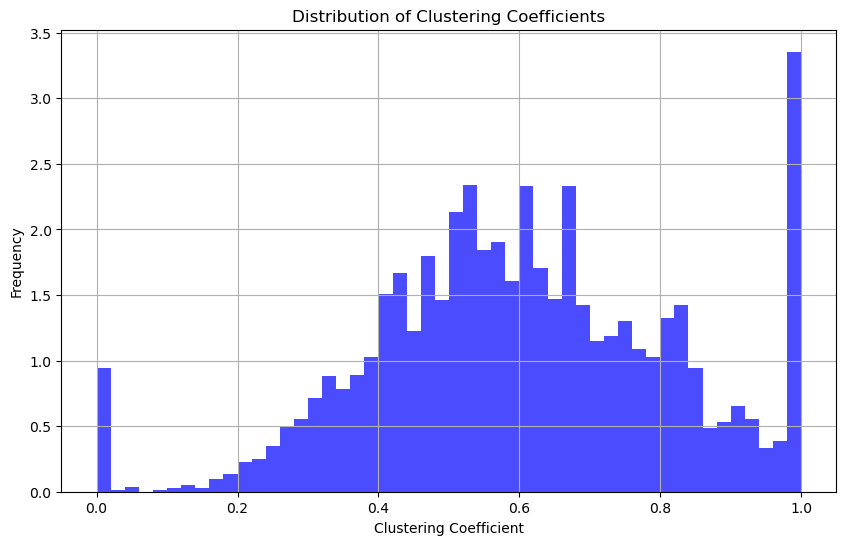

Average Clustering Coefficient: 0.6055467186200862


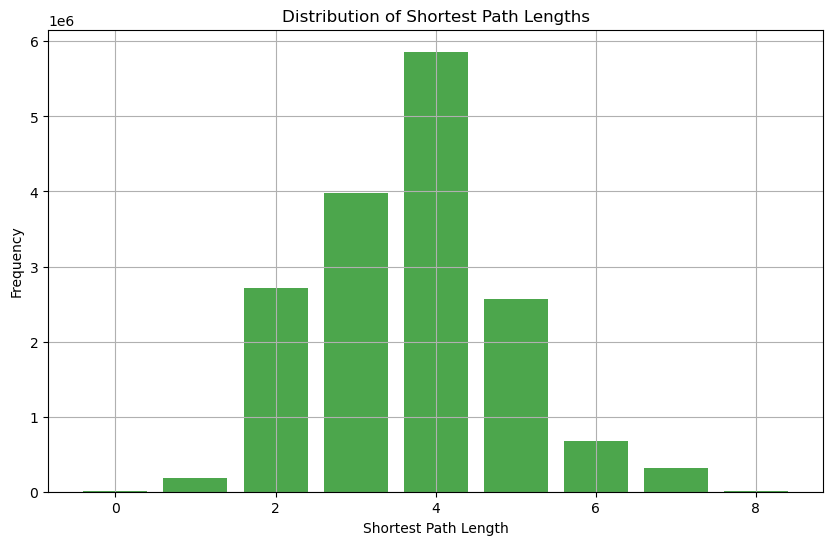

Average Path Length: 3.691592636562027
Diameter of the Graph: 8


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Load the dataset
file_path = "facebook_combined.txt"  # Ensure the dataset is in the same folder
G = nx.read_edgelist(file_path, nodetype=int)

# Step 2: Clustering Coefficient Analysis
clustering_coeffs = nx.clustering(G)  # Compute clustering coefficient for all nodes
avg_clustering = np.mean(list(clustering_coeffs.values()))  # Average clustering coefficient
clustering_values = list(clustering_coeffs.values())

# Plot the distribution of clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=50, density=True, color='b', alpha=0.7)
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of Clustering Coefficients")
plt.grid(True)
plt.savefig("clustering_distribution.png")
plt.show()

print(f"Average Clustering Coefficient: {avg_clustering}")

# Step 3: Shortest Path Analysis
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))  # Compute all-pairs shortest paths
path_length_counts = {}

for source in shortest_path_lengths:
    for target, length in shortest_path_lengths[source].items():
        if length not in path_length_counts:
            path_length_counts[length] = 0
        path_length_counts[length] += 1

# Compute the average path length and the diameter
total_path_lengths = sum(length * count for length, count in path_length_counts.items())
total_paths = sum(path_length_counts.values())
avg_path_length = total_path_lengths / total_paths
diameter = max(path_length_counts.keys())

# Plot the distribution of shortest paths
plt.figure(figsize=(10, 6))
plt.bar(path_length_counts.keys(), path_length_counts.values(), color='g', alpha=0.7)
plt.xlabel("Shortest Path Length")
plt.ylabel("Frequency")
plt.title("Distribution of Shortest Path Lengths")
plt.grid(True)
plt.savefig("path_length_distribution.png")
plt.show()

print(f"Average Path Length: {avg_path_length}")
print(f"Diameter of the Graph: {diameter}")


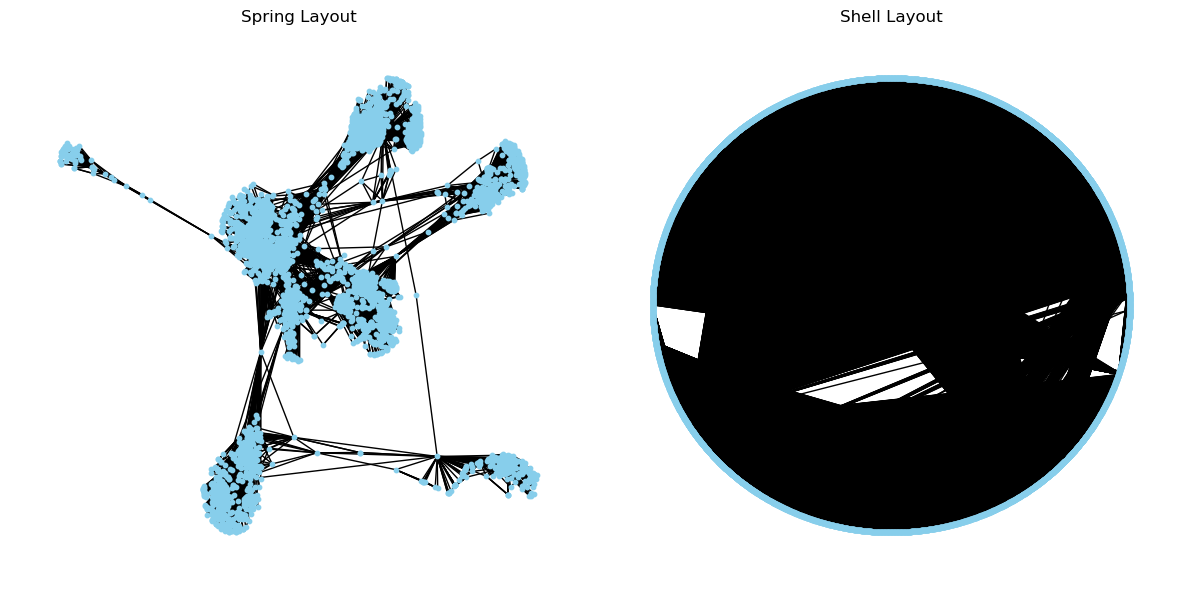

In [46]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_network(file_path):
    """
    Reads a file with edge data and plots the network using spring and shell layouts.

    :param file_path: Path to the text file containing edge data.
                      Each line in the file should represent an edge in the format: `node1 node2`
    """
    # Create a graph
    G = nx.Graph()

    # Read edges from the file and add to the graph
    with open(file_path, 'r') as f:
        for line in f:
            nodes = line.strip().split()
            if len(nodes) == 2:  # Ensure each line contains exactly two nodes
                G.add_edge(int(nodes[0]), int(nodes[1]))

    # Plot using spring layout
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    pos_spring = nx.spring_layout(G)
    nx.draw(G, pos_spring, with_labels=False, node_size=10,
            node_color="skyblue", edge_color="black")
    plt.title("Spring Layout")

    # Plot using shell layout
    plt.subplot(1, 2, 2)
    pos_shell = nx.shell_layout(G)
    nx.draw(G, pos_shell, with_labels=False, node_size=10,
            node_color="skyblue", edge_color="black")
    plt.title("Shell Layout")

    plt.tight_layout()
    plt.savefig('network_layouts.png')
    plt.show()

# Example usage:
# Replace 'network_data.txt' with the path to your file
plot_network('facebook_combined.txt')

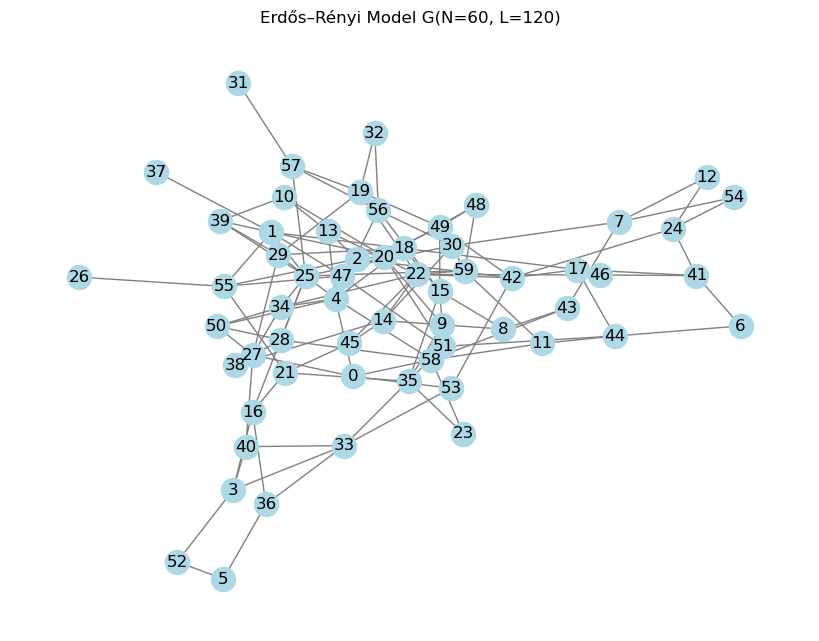

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Function to generate Erdős–Rényi model
def erdos_renyi(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    edges = set()
    while len(edges) < L:
        u = random.randint(0, N - 1)
        v = random.randint(0, N - 1)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))

    G.add_edges_from(edges)
    return G

# Parameters
N = 20 * 3  # Number of nodes
L = 40 * 3 # Number of edges
G_NL = erdos_renyi(N, L)

# Plotting
plt.figure(figsize=(8, 6))
nx.draw(G_NL, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title(f"Erdős–Rényi Model G(N={N}, L={L})")
plt.savefig("erdos_renyi_NL.png")
plt.show()


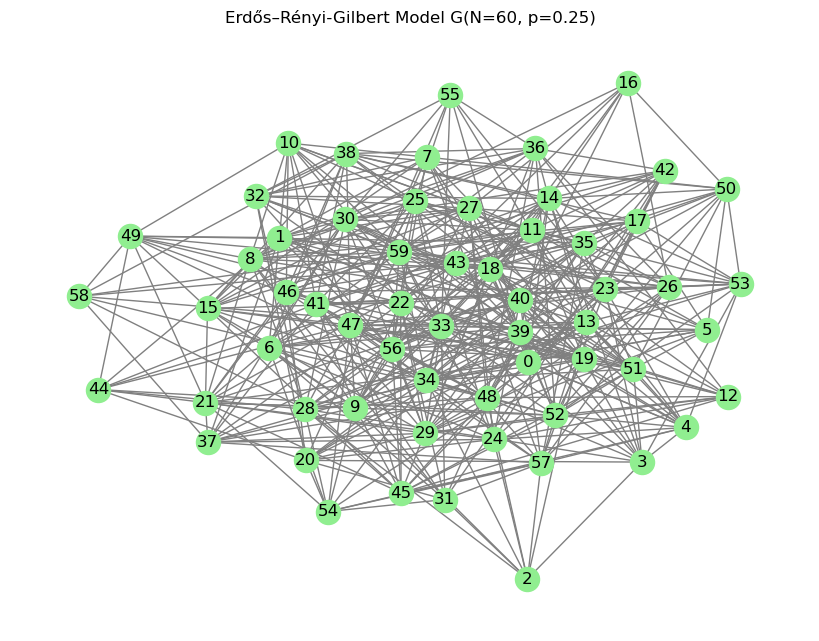

In [18]:
# Parameters
N = 60  # Number of nodes
p = 0.25  # Probability of edge creation
G_Np = nx.erdos_renyi_graph(N, p)

# Plotting
plt.figure(figsize=(8, 6))
nx.draw(G_Np, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title(f"Erdős–Rényi-Gilbert Model G(N={N}, p={p})")
plt.savefig("erdos_renyi_gilbert_model.png")
plt.show()


Number of nodes: 20
Number of edges: 40


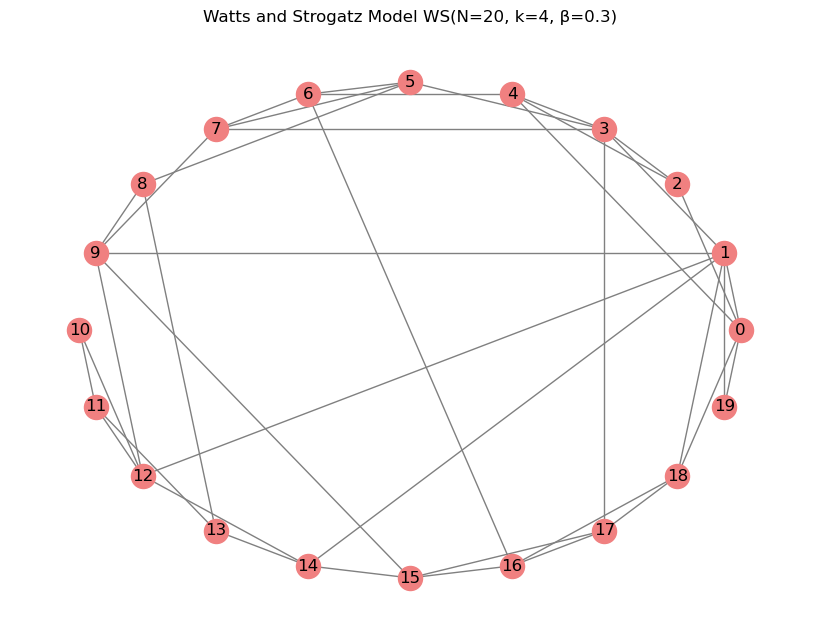

In [34]:
# Parameters
N = 20  # Number of nodes
k = 4   # Each node is connected to k neighbors
beta = 0.3  # Rewiring probability
G_WS = nx.watts_strogatz_graph(N, k, beta)

# Print the number of nodes and edges
print(f"Number of nodes: {G_WS.number_of_nodes()}")
print(f"Number of edges: {G_WS.number_of_edges()}")


# Plotting
plt.figure(figsize=(8, 6))
nx.draw_circular(G_WS, with_labels=True, node_color='lightcoral', edge_color='gray')
plt.title(f"Watts and Strogatz Model WS(N={N}, k={k}, β={beta})")
plt.savefig('WS.png')
plt.show()

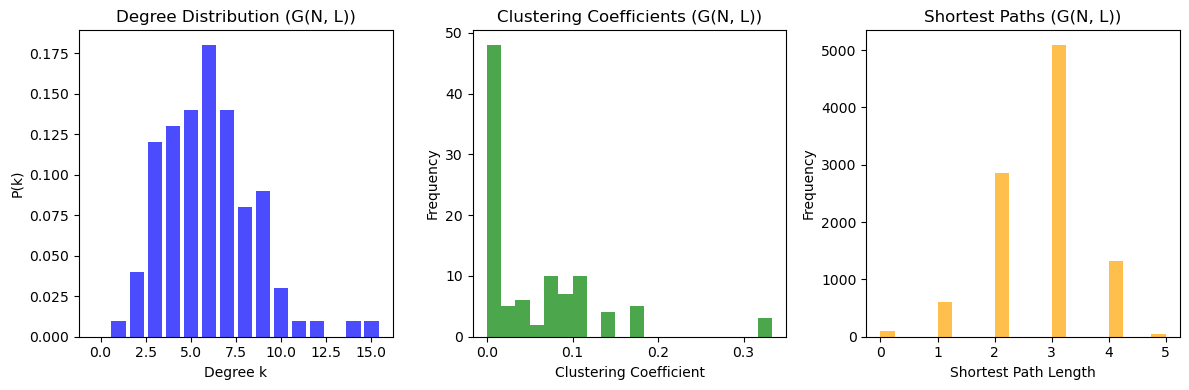

Graph: G(N, L)
Average Degree: 6.0
Average Clustering Coefficient: 0.052507437007437006
Average Path Length: 2.706
Diameter: 5
--------------------------------------------------


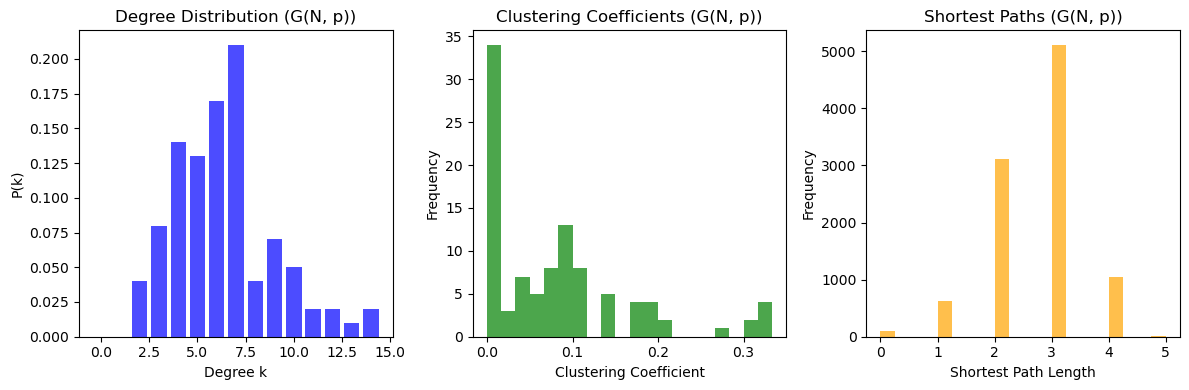

Graph: G(N, p)
Average Degree: 6.34
Average Clustering Coefficient: 0.07963625263625264
Average Path Length: 2.6372
Diameter: 5
--------------------------------------------------


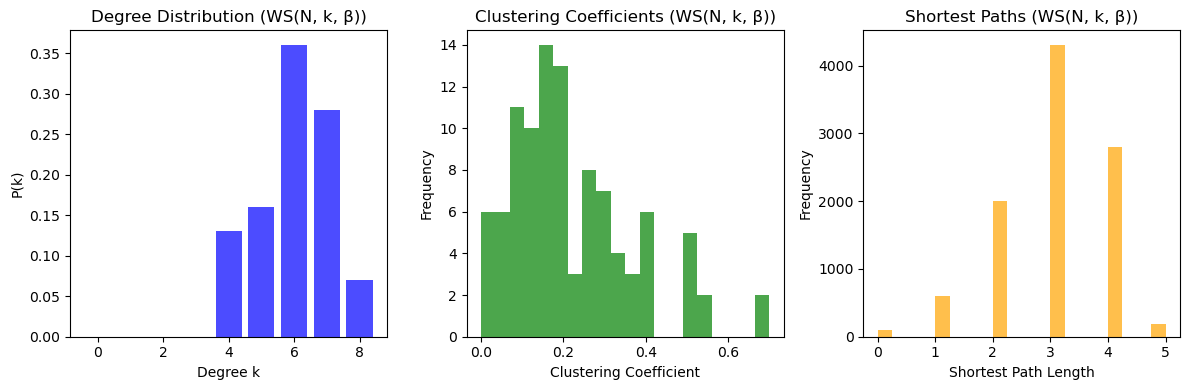

Graph: WS(N, k, β)
Average Degree: 6.0
Average Clustering Coefficient: 0.22028571428571425
Average Path Length: 2.9694
Diameter: 5
--------------------------------------------------


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# General parameters for comparison
N = 100  # Number of nodes
avg_degree = 6  # Approximate average degree
L = (N * avg_degree) // 2  # Number of edges for G(N, L)
p = avg_degree / (N - 1)  # Probability for G(N, p)
k = avg_degree  # Neighbors for WS(N, k, beta)
beta = 0.3  # Rewiring probability for WS

# Generate the graphs
G_NL = nx.gnm_random_graph(N, L)  # G(N, L)
G_Np = nx.erdos_renyi_graph(N, p)  # G(N, p)
G_WS = nx.watts_strogatz_graph(N, k, beta)  # WS(N, k, beta)

graphs = {"G(N, L)": G_NL, "G(N, p)": G_Np, "WS(N, k, β)": G_WS}

# Analysis functions
def analyze_graph(graph, title):
    # Degree Distribution
    degrees = [degree for _, degree in graph.degree()]
    avg_degree = np.mean(degrees)
    degree_counts = np.bincount(degrees)
    P_k = degree_counts / graph.number_of_nodes()

    # Clustering Coefficient
    clustering_coeffs = nx.clustering(graph).values()
    avg_clustering = np.mean(list(clustering_coeffs))

    # Shortest Path Analysis
    if nx.is_connected(graph):
        shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))
        path_lengths = [
            length for source in shortest_path_lengths for length in shortest_path_lengths[source].values()
        ]
        avg_path_length = np.mean(path_lengths)
        diameter = max(path_lengths)
    else:
        avg_path_length = None
        diameter = None

    # Plot Degree Distribution
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.bar(range(len(P_k)), P_k, color="blue", alpha=0.7)
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    plt.title(f"Degree Distribution ({title})")

    # Plot Clustering Coefficients Distribution
    plt.subplot(1, 3, 2)
    plt.hist(clustering_coeffs, bins=20, color="green", alpha=0.7)
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.title(f"Clustering Coefficients ({title})")

    # Plot Shortest Path Lengths (if applicable)
    if avg_path_length is not None:
        plt.subplot(1, 3, 3)
        plt.hist(path_lengths, bins=20, color="orange", alpha=0.7)
        plt.xlabel("Shortest Path Length")
        plt.ylabel("Frequency")
        plt.title(f"Shortest Paths ({title})")
    else:
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, "Graph is disconnected", fontsize=12, ha="center")
        plt.title(f"Shortest Paths ({title})")
        plt.axis("off")

    plt.tight_layout()
    plt.savefig(f"{title}_{graph}.png")
    plt.show()

    # Print Metrics
    print(f"Graph: {title}")
    print(f"Average Degree: {avg_degree}")
    print(f"Average Clustering Coefficient: {avg_clustering}")
    if avg_path_length is not None:
        print(f"Average Path Length: {avg_path_length}")
        print(f"Diameter: {diameter}")
    else:
        print("Graph is disconnected, cannot compute path metrics.")
    print("-" * 50)

# Analyze all graphs
for name, graph in graphs.items():
    analyze_graph(graph, name)


In [51]:
import networkx as nx
import numpy as np

# Parameters
N = 100  # Number of nodes
avg_degree = 6  # Target average degree
L = (N * avg_degree) // 2  # Number of edges for G(N, L)
p = avg_degree / (N - 1)  # Probability for G(N, p)
k = avg_degree  # Neighbors for WS(N, k, beta)
beta = 0.3  # Rewiring probability for WS

# Generate the graphs
G_NL = nx.gnm_random_graph(N, L)  # G(N, L)
G_Np = nx.erdos_renyi_graph(N, p)  # G(N, p)
G_WS = nx.watts_strogatz_graph(N, k, beta)  # WS(N, k, beta)

# Analytical metrics
print("\n--- Erdős–Rényi Model G(N, L) ---")
k_theoretical_NL = 2 * L / N
print(f"Theoretical <k>: {k_theoretical_NL:.2f}")
# Empirical <k>
k_empirical_NL = np.mean([d for _, d in G_NL.degree()])
print(f"Empirical <k>: {k_empirical_NL:.2f}")

print("\n--- Erdős–Rényi-Gilbert Model G(N, p) ---")
k_theoretical_Np = p * (N - 1)
print(f"Theoretical <k>: {k_theoretical_Np:.2f}")
# Clustering Coefficient (theoretical)
c_theoretical_Np = k_theoretical_Np / (N - 1)
print(f"Theoretical clustering coefficient: {c_theoretical_Np:.4f}")
# Empirical <k> and C
k_empirical_Np = np.mean([d for _, d in G_Np.degree()])
c_empirical_Np = nx.average_clustering(G_Np)
print(f"Empirical <k>: {k_empirical_Np:.2f}")
print(f"Empirical clustering coefficient: {c_empirical_Np:.4f}")

print("\n--- Watts–Strogatz Model WS(N, k, β) ---")
k_theoretical_WS = k  # Constant
print(f"Theoretical <k>: {k_theoretical_WS:.2f}")
# Clustering Coefficient (theoretical)
c_theoretical_WS_0 = 0.75 * (k - 2) / (k - 1)
c_theoretical_WS_1 = k / (N - 1)
print(f"Theoretical C(β=0): {c_theoretical_WS_0:.4f}")
print(f"Theoretical C(β=1): {c_theoretical_WS_1:.4f}")
# Empirical <k> and C
k_empirical_WS = np.mean([d for _, d in G_WS.degree()])
c_empirical_WS = nx.average_clustering(G_WS)
print(f"Empirical <k>: {k_empirical_WS:.2f}")
print(f"Empirical clustering coefficient: {c_empirical_WS:.4f}")



--- Erdős–Rényi Model G(N, L) ---
Theoretical <k>: 6.00
Empirical <k>: 6.00

--- Erdős–Rényi-Gilbert Model G(N, p) ---
Theoretical <k>: 6.00
Theoretical clustering coefficient: 0.0606
Empirical <k>: 5.50
Empirical clustering coefficient: 0.0464

--- Watts–Strogatz Model WS(N, k, β) ---
Theoretical <k>: 6.00
Theoretical C(β=0): 0.6000
Theoretical C(β=1): 0.0606
Empirical <k>: 6.00
Empirical clustering coefficient: 0.2556


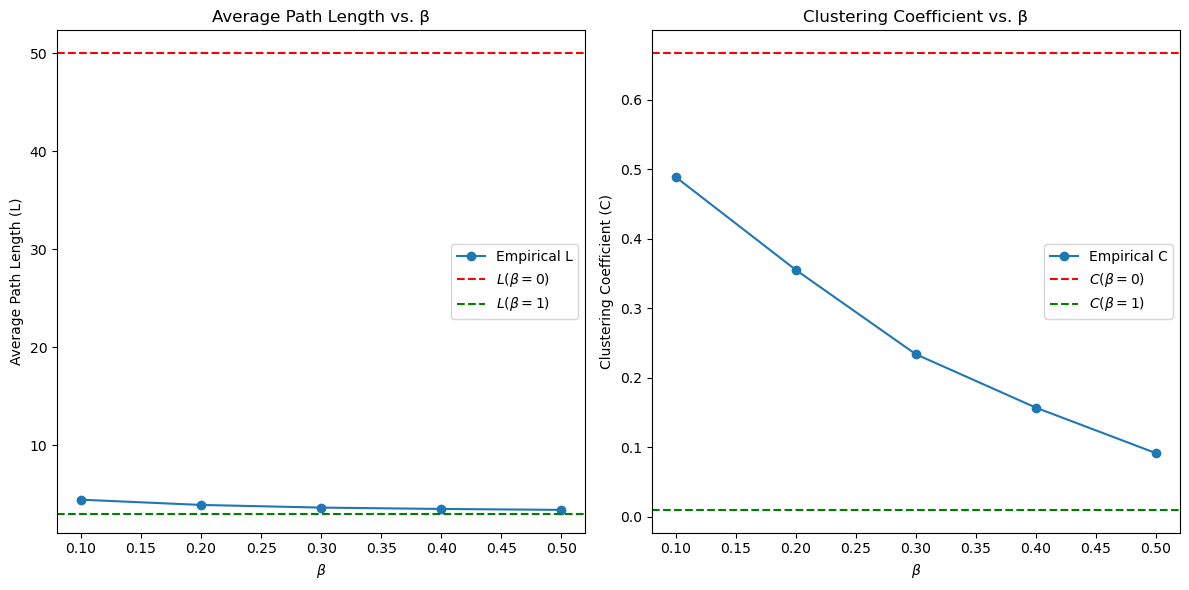

In [52]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of nodes
k = 10  # Number of neighbors
beta_values = np.linspace(0.1, 0.5, 5)  # Range of beta values

# Containers for results
path_lengths = []
clustering_coefficients = []

# Iterate over beta values
for beta in beta_values:
    G_WS = nx.watts_strogatz_graph(N, k, beta)  # Generate graph
    avg_path_length = nx.average_shortest_path_length(G_WS)  # Average path length
    avg_clustering = nx.average_clustering(G_WS)  # Average clustering coefficient

    path_lengths.append(avg_path_length)
    clustering_coefficients.append(avg_clustering)

# Theoretical L values for comparison
L_theoretical_0 = N / (2 * k)
L_theoretical_1 = np.log(N) / np.log(k)

# Plotting
plt.figure(figsize=(12, 6))

# Plot average path length
plt.subplot(1, 2, 1)
plt.plot(beta_values, path_lengths, 'o-', label='Empirical L')
plt.axhline(L_theoretical_0, color='r', linestyle='--', label=r'$L(\beta=0)$')
plt.axhline(L_theoretical_1, color='g', linestyle='--', label=r'$L(\beta=1)$')
plt.xlabel(r'$\beta$')
plt.ylabel('Average Path Length (L)')
plt.title('Average Path Length vs. β')
plt.legend()

# Plot clustering coefficient
plt.subplot(1, 2, 2)
plt.plot(beta_values, clustering_coefficients, 'o-', label='Empirical C')
plt.axhline(0.75 * (k - 2) / (k - 1), color='r', linestyle='--', label=r'$C(\beta=0)$')
plt.axhline(k / (N - 1), color='g', linestyle='--', label=r'$C(\beta=1)$')
plt.xlabel(r'$\beta$')
plt.ylabel('Clustering Coefficient (C)')
plt.title('Clustering Coefficient vs. β')
plt.legend()

plt.tight_layout()
plt.show()
